In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import h5py

In [4]:
file = '/home/idies/workspace/Storage/dyu/persistent/full_1800_stats.h5'

with h5py.File(file, 'r') as f:
    X = f['phi_stats'][:]
    y = f['is_pulsar'][:]

In [8]:
X_df = pd.DataFrame(X)
X_df.columns = ['mean','std','min','q25','median','q75','max','var','skewness','kurtosis']
X_df.head()

,mean,std,min,q25,median,q75,max,var,skewness,kurtosis
0,1471.239444,2002.237161,0.0,0.0,340.5,2559.75,10743.0,4.008954e+06,1.534434,2.037281
1,1507.966667,2031.330330,0.0,0.0,439.0,2618.75,14865.0,4.126303e+06,1.593679,2.708295
2,1539.510556,2039.757477,0.0,0.0,516.5,2647.25,14865.0,4.160611e+06,1.560558,2.574252
3,1587.027222,2064.142977,0.0,0.0,589.5,2723.50,14865.0,4.260686e+06,1.517722,2.375904
4,1610.682222,2063.678137,0.0,0.0,645.5,2774.50,14865.0,4.258767e+06,1.495810,2.316868


In [9]:
y_df = pd.DataFrame(y)
y_df.columns = ['label']
y_df.head()

,label
0,0
1,0
2,0
3,0
4,0


In [10]:
pulsars_df = X_df[(y_df == 1).values]
bh_df = X_df[(y_df == 0).values]

In [11]:
def row_summary_stats(df):
    num_df = df.select_dtypes(include='number')
    
    summary = pd.DataFrame({
        'mean':   num_df.mean(axis=1),
        'std':    num_df.std(axis=1),
        'min':    num_df.min(axis=1),
        'q1':     num_df.quantile(0.25, axis=1),
        'median': num_df.quantile(0.50, axis=1),
        'q3':     num_df.quantile(0.75, axis=1),
        'max':    num_df.max(axis=1),
        'iqr':    num_df.quantile(0.75, axis=1) - num_df.quantile(0.25, axis=1),
        'skew':   num_df.skew(axis=1),
        'kurtosis': num_df.kurtosis(axis=1)
    })
    
    return summary

In [12]:
p_row_stats = row_summary_stats(pulsars_df)
bh_row_stats = row_summary_stats(bh_df)
p_row_stats.shape, bh_row_stats.shape

((91462, 10), (250934, 10))

<Axes: >

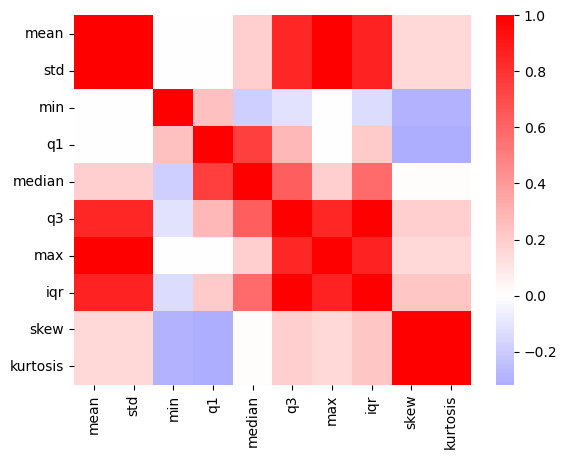

In [13]:
p_row_corr = p_row_stats.sample(frac=.2).corr()
sns.heatmap(p_row_corr, cmap="bwr", center=0)

<Axes: >

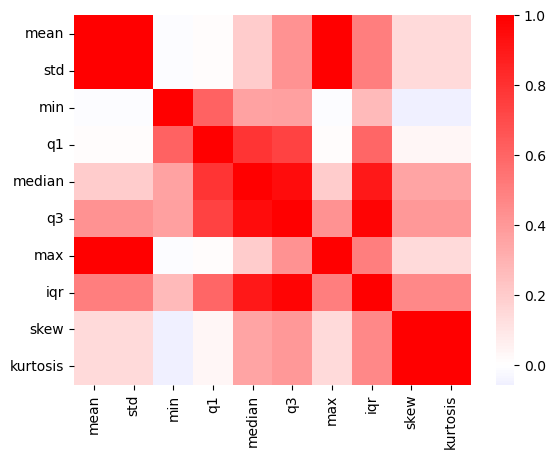

In [14]:
bh_row_corr = bh_row_stats.sample(frac=.2).corr()
sns.heatmap(bh_row_corr, cmap="bwr", center=0)

<Axes: >

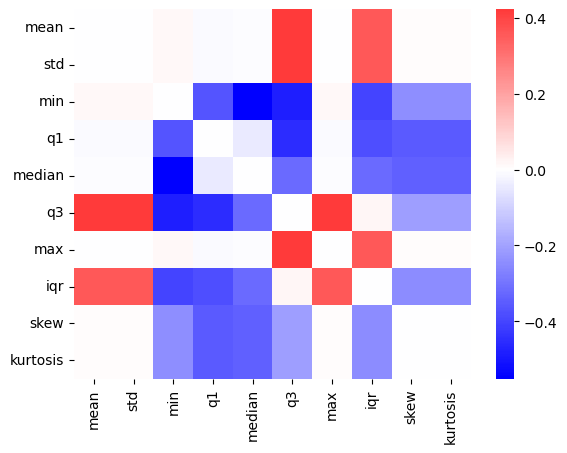

In [15]:
sns.heatmap(p_row_corr - bh_row_corr, cmap="bwr", center=0)

In [16]:
p_row_stats["label"] = "pulsar"
bh_row_stats["label"] = "bh"
row_stats = pd.concat([p_row_stats, bh_row_stats], axis=0).reset_index(drop=True)
row_stats.shape

(342396, 11)

In [17]:
row_stats_norm = (row_stats.drop(columns=["label"]) - row_stats.drop(columns=["label"]).mean())/ row_stats.drop(columns=["label"]).std()
row_stats_norm.describe()

,mean,std,min,q1,median,q3,max,iqr,skew,kurtosis
count,3.423960e+05,3.423960e+05,3.423960e+05,3.423960e+05,3.423960e+05,3.423960e+05,3.423960e+05,3.423960e+05,3.423960e+05,3.423960e+05
mean,2.656266e-18,2.656266e-18,-1.062506e-16,-5.312531e-18,-1.328133e-16,-6.109411e-17,7.968797e-18,1.328133e-17,2.244390e-12,2.843654e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.196250e-02,-4.190658e-02,-7.151975e+00,-4.862709e-01,-1.217899e+00,-7.391317e-01,-4.191220e-02,-7.128016e-01,-1.382194e+01,-1.386629e+01
25%,-3.294882e-02,-3.293534e-02,-2.330304e-01,-4.767702e-01,-5.106491e-01,-2.632537e-01,-3.293666e-02,-2.283466e-01,-4.225955e-01,-4.223135e-01
50%,-3.070675e-02,-3.070339e-02,-2.330304e-01,-3.339057e-01,-1.420773e-01,-1.036534e-01,-3.070376e-02,-8.054248e-02,1.833947e-01,1.836901e-01
75%,-2.819072e-02,-2.819959e-02,-2.330304e-01,1.614016e-01,2.951578e-01,9.251118e-02,-2.819871e-02,7.979222e-02,6.316683e-01,6.316729e-01
max,5.498498e+01,5.498571e+01,1.070506e+01,1.726901e+01,1.694405e+01,3.650654e+01,5.498563e+01,3.773728e+01,2.583020e+00,2.579304e+00


In [33]:
row_stats_norm.head()

,mean,std,min,q1,median,q3,max,iqr,skew,kurtosis,label
0,-0.027449,-0.027474,2.335278,1.938398,0.839443,0.567357,-0.027472,0.378258,1.053220,1.053171,pulsar
1,-0.027376,-0.027401,2.231363,1.943595,0.855168,0.572908,-0.027399,0.383433,1.063219,1.063159,pulsar
2,-0.027673,-0.027699,2.279054,1.950610,0.856961,0.572036,-0.027696,0.381781,1.021491,1.021503,pulsar
3,-0.027433,-0.027458,2.406504,1.948272,0.865767,0.572533,-0.027456,0.382544,1.055743,1.055698,pulsar
4,-0.027403,-0.027429,2.314835,1.953468,0.874103,0.582403,-0.027426,0.392177,1.058946,1.058904,pulsar


In [39]:
row_stats_norm["label"] = row_stats["label"]
for col in row_stats_norm.columns:
    if col != "label":
        row_stats_norm = row_stats_norm[row_stats_norm[col] < 4]

<Axes: xlabel='label', ylabel='mean'>

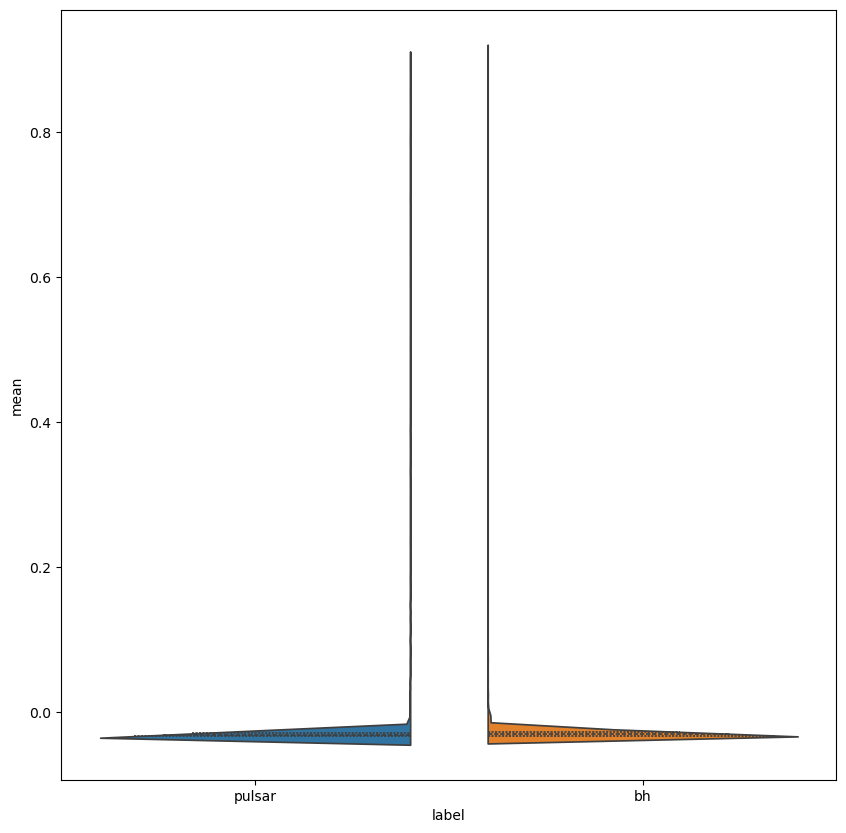

In [40]:
plt.figure(figsize=(10,10))
sns.violinplot(x="label", y="mean", hue="label", data=row_stats_norm, split=True, inner="quart")

<Axes: xlabel='label', ylabel='iqr'>

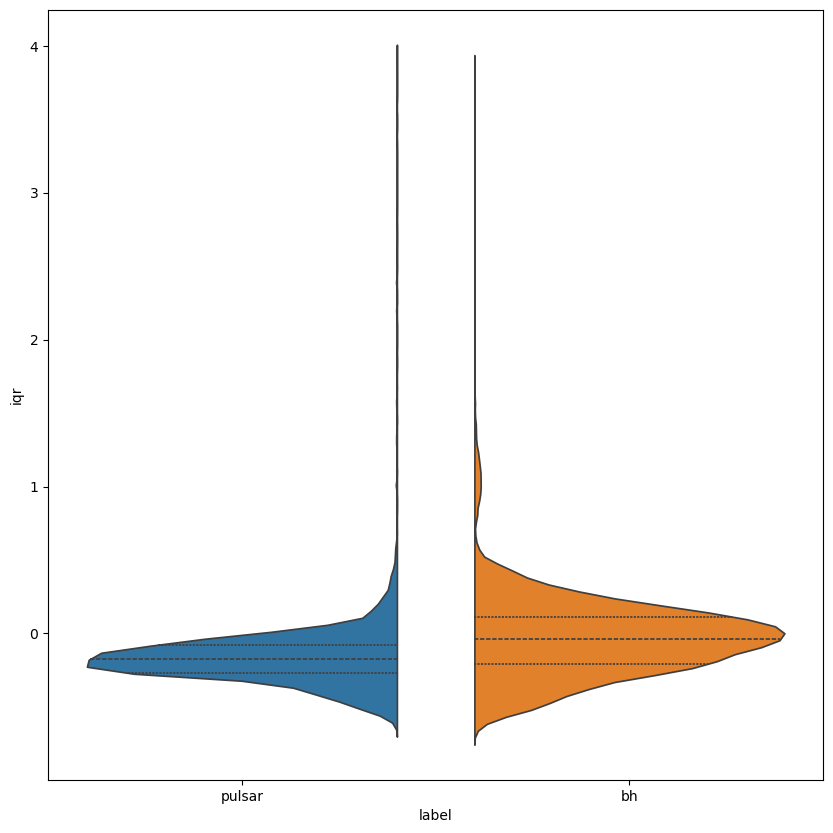

In [41]:
plt.figure(figsize=(10,10))
sns.violinplot(x="label", y="iqr", hue="label", data=row_stats_norm, split=True, inner="quart")

<Axes: xlabel='label', ylabel='std'>

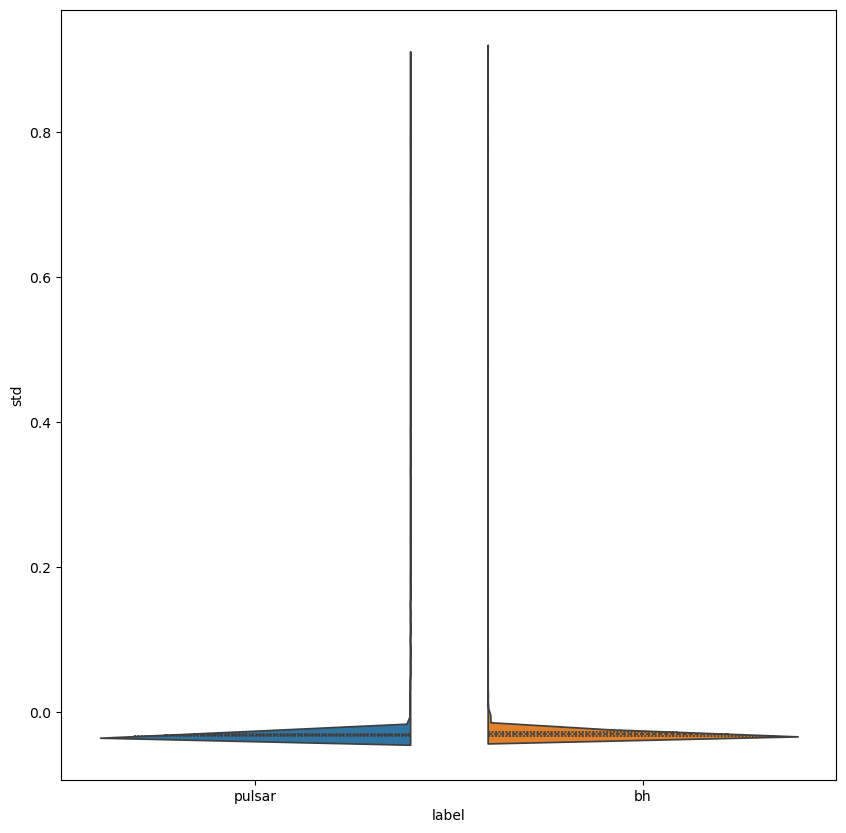

In [42]:
plt.figure(figsize=(10,10))
sns.violinplot(x="label", y="std", hue="label", data=row_stats_norm, split=True, inner="quart")

<Axes: xlabel='label', ylabel='skew'>

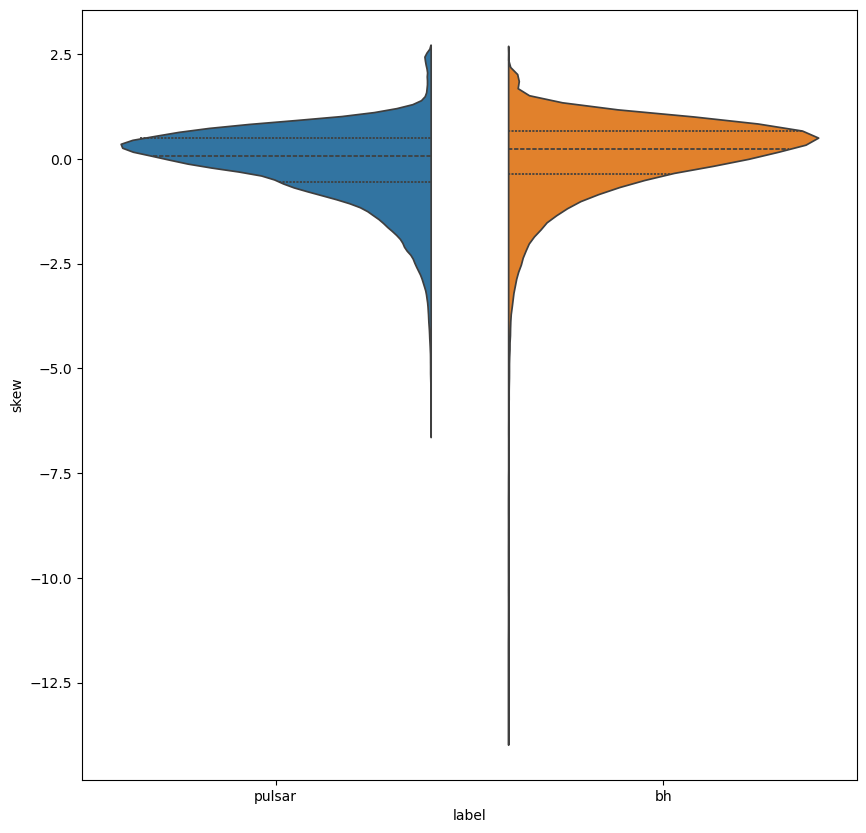

In [43]:
plt.figure(figsize=(10,10))
sns.violinplot(x="label", y="skew", hue="label", data=row_stats_norm, split=True, inner="quart")

<Axes: xlabel='label', ylabel='kurtosis'>

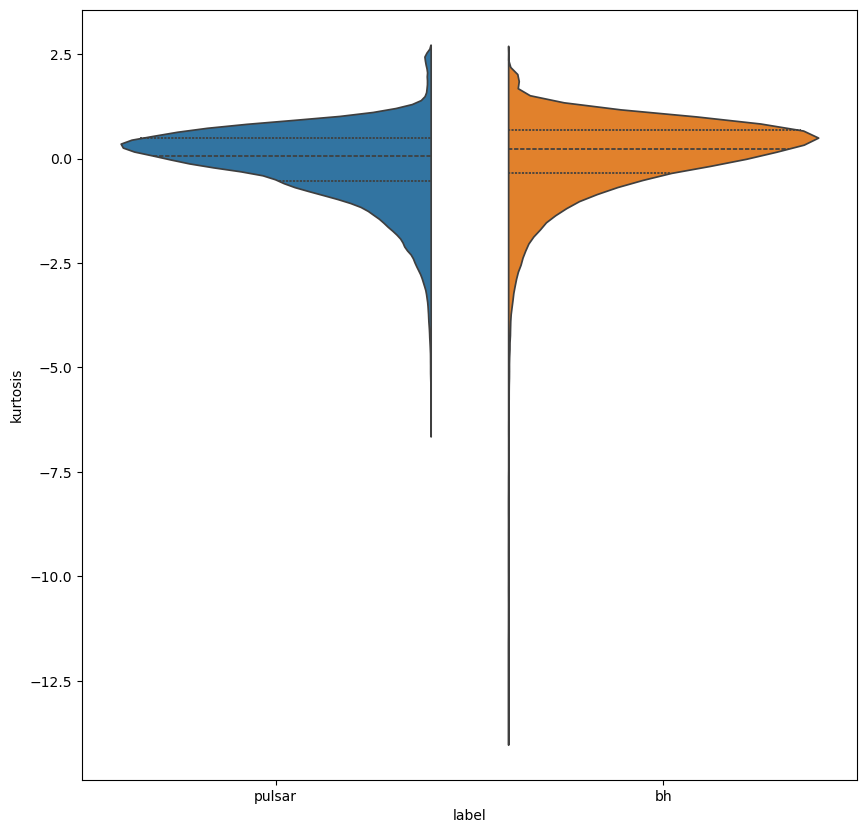

In [44]:
plt.figure(figsize=(10,10))
sns.violinplot(x="label", y="kurtosis", hue="label", data=row_stats_norm, split=True, inner="quart")

In [29]:
plt.figure(figsize=(10,10))
sns.violinplot(x="label", y="", hue="label", data=row_stats_norm, split=True, inner="quart")

ValueError: Could not interpret value `var` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x1000 with 0 Axes>

<Axes: >

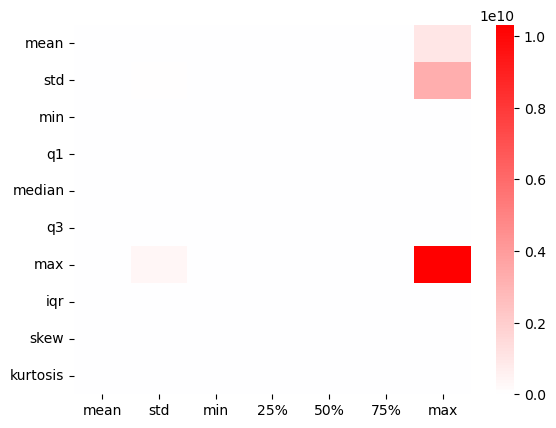

In [30]:
p_summary = p_row_stats.describe().T.drop(columns=["count"])
bh_summary = bh_row_stats.describe().T.drop(columns=["count"])
sns.heatmap(p_summary - bh_summary, cmap="bwr", center=0)